# Heart Failure Survival Prediction

### Brandon May

Cardiovascular disease is still an important cause of morbidity and mortality worldwide.  Heart failure, which is an inability for the heart to pump blood efficiency can easily be fatal and diagnosis can be challenging.  While traditional machine learning has not been extensively used in clinical medicine outside of academic research environments, there are many different applications of this.  

Heart failure can be particularly devastating and caused by a wide variety of different clinical entities and many times, the cause is unknown.  Certain therapies have been shown to improve outcomes in heart failure but is there a way to better detect mortality from heart failure to perhaps increase monitoring and intensify management of heart failure patients?  This is the goal of this machine learning project.

__Dataset Description:__

This project focuses on a dataset that was used in the medical journal of BMC Medical Informatics and Decision Making.  The citation of the dataset and the research article is pubilicly available by PLOS.

The dataset can be found at the following URL:

https://plos.figshare.com/articles/Survival_analysis_of_heart_failure_patients_A_case_study/5227684/1
	
The target variable in the dataset is classified as Event with 1 signifying death in the study.  All subjects in this study were diagnosed with heart failure.  There were otherwise 12 other features to use in the prediction of death including age, gender, smoking status, diabetes, anemia, ejection fraction, sodium level, creatinine, CPK, and platelets.

__Reference Cited:__

Chicco, D., & Jurman, G. (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making, 20(1). doi:10.1186/s12911-020-1023-5


# Data Cleaning, Exploration, and Analysis

In [1]:
#Loading Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Silencing Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Dataset and Viewing
df = pd.read_csv("heart_failure_prediction.csv")
df

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,250,0,0,0,1,0,0,45.0,55,132,1.00,543000.00,582
295,244,0,0,0,1,0,0,51.0,40,134,0.90,221000.00,582
296,14,1,1,0,0,0,0,45.0,14,127,0.80,166000.00,582
297,80,0,1,0,1,0,0,60.0,45,133,1.00,297000.00,897


In [2]:
df.isnull().values.any()

False

__There are no missing values in the dataset.__

In [3]:
#Renaming Columns for Simplicity

df = df.rename(columns={"TIME": "Time", "Anaemia": "Anemia", "Ejection.Fraction": "EF", "Pletelets": "Platelets"})
df

,Time,Event,Gender,Smoking,Diabetes,BP,Anemia,Age,EF,Sodium,Creatinine,Platelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,250,0,0,0,1,0,0,45.0,55,132,1.00,543000.00,582
295,244,0,0,0,1,0,0,51.0,40,134,0.90,221000.00,582
296,14,1,1,0,0,0,0,45.0,14,127,0.80,166000.00,582
297,80,0,1,0,1,0,0,60.0,45,133,1.00,297000.00,897


### Description of the Variables

__TIME:__  Integer, signifying length of follow-up in days.

__Event:__  Categorical (0: Died, 1: Alive)

__Gender:__ Categorical (0: Female, 1: Male)

__Smoking:__ Categorical (0: Non-Smoker, 1: Smoker)

__Diabetes:__ Categorical (0: No Diabetes, 1: Diabetes)

__BP:__ Categorical (0: No Hypertension, 1: Has Hypertension)

__Anaemia:__ Categorical (0: No Anemia, 1: Anemia)

__Age:__ Float (in years)

__Ejection.Fraction:__ Integer (percentage)

__Sodium:__ Integer (mg/dL)

__Creatinine:__ Float (mg/dL)

__Platelets:__ Float (mg/dL)

__CPK:__ Integer


In [4]:
#Checking Data Types and Encoding As Appropriate
df.dtypes

Time            int64
Event           int64
Gender          int64
Smoking         int64
Diabetes        int64
BP              int64
Anemia          int64
Age           float64
EF              int64
Sodium          int64
Creatinine    float64
Platelets     float64
CPK             int64
dtype: object

In [5]:
#Recoding Our Categorical Variables

df['Event'] = df['Event'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Smoking'] = df['Smoking'].astype('category')
df['Diabetes'] = df['Diabetes'].astype('category')
df['BP'] = df['BP'].astype('category')
df['Anemia'] = df['Anemia'].astype('category')

In [6]:
#Making Sure Coded Correctly
df.dtypes

Time             int64
Event         category
Gender        category
Smoking       category
Diabetes      category
BP            category
Anemia        category
Age            float64
EF               int64
Sodium           int64
Creatinine     float64
Platelets      float64
CPK              int64
dtype: object

In [7]:
print('Description of Numerical Categories')
df.describe()

Description of Numerical Categories


,Time,Age,EF,Sodium,Creatinine,Platelets,CPK
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,130.260870,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,77.614208,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,4.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,73.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,115.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,203.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,285.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


The numerical variables have some interesting descriptive statistics.  The lowest age was 40 and the oldest person was 95.  The lowest ejection fraction was 14% and the maximum was 80%.  There was a significantly low sodium value of 113 and a high level of 148.  For reference, normal sodium levels are between 135-145.  The highest creatinine was 9.4 which is exceedingly high approaching renal failure range.  Likewise, the lowest platelets of 25K and the highest were 850000.  CPK, a muscle enzyme, had minimums of 23K with maximum of 7800K.

Looking at the means, the mean follow-up time was 130 days, age 60, EF of 38%, sodium of 136, creatinine of 1.39 (slightly elevated), 263K platelets (which is normal), and CPK of 481.

In [8]:
print('Description of Categorical Variables')
df.describe(include=['category'])

Description of Categorical Variables


,Event,Gender,Smoking,Diabetes,BP,Anemia
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,0,1,0,0,0,0
freq,203,194,203,174,194,170


Based on the categorical variables, more patients were alive, male, non-smokers, non-diabetic, non-anemic, and with normal blood pressure.

In [9]:
#Searching for High Correlations
corr_matrix = df.corr()
corr_matrix

,Time,Age,EF,Sodium,Creatinine,Platelets,CPK
Time,1.000000,-0.224068,0.041729,0.087640,-0.149315,0.010514,-0.009346
Age,-0.224068,1.000000,0.060098,-0.045966,0.159187,-0.052354,-0.081584
EF,0.041729,0.060098,1.000000,0.175902,-0.011302,0.072177,-0.044080
Sodium,0.087640,-0.045966,0.175902,1.000000,-0.189095,0.062125,0.059550
Creatinine,-0.149315,0.159187,-0.011302,-0.189095,1.000000,-0.041198,-0.016408
Platelets,0.010514,-0.052354,0.072177,0.062125,-0.041198,1.000000,0.024463
CPK,-0.009346,-0.081584,-0.044080,0.059550,-0.016408,0.024463,1.000000


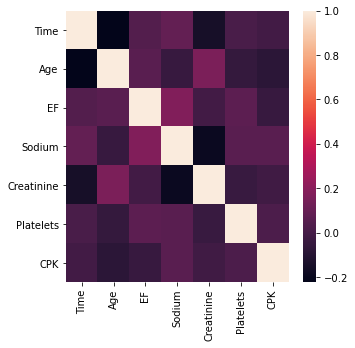

In [10]:
#Displaying Heat Map
plt.rcParams['figure.figsize'] = (5,5)

#Importing Seaborn
import seaborn as sns

sns.heatmap(corr_matrix)
plt.show()

There do not appear to be any highly correlated variables.

In [11]:
#Creating Dataset with Categorical Only and Numerical Only

df_cat = df.drop(columns=['Time', 'Age', 'EF', 'Sodium', 'Creatinine', 'Platelets', 'CPK'])
df_num = df.drop(columns=['Event', 'Gender', 'Smoking', 'Diabetes', 'BP', 'Anemia'])

IndexError: single positional indexer is out-of-bounds

<Figure size 7200x7200 with 0 Axes>

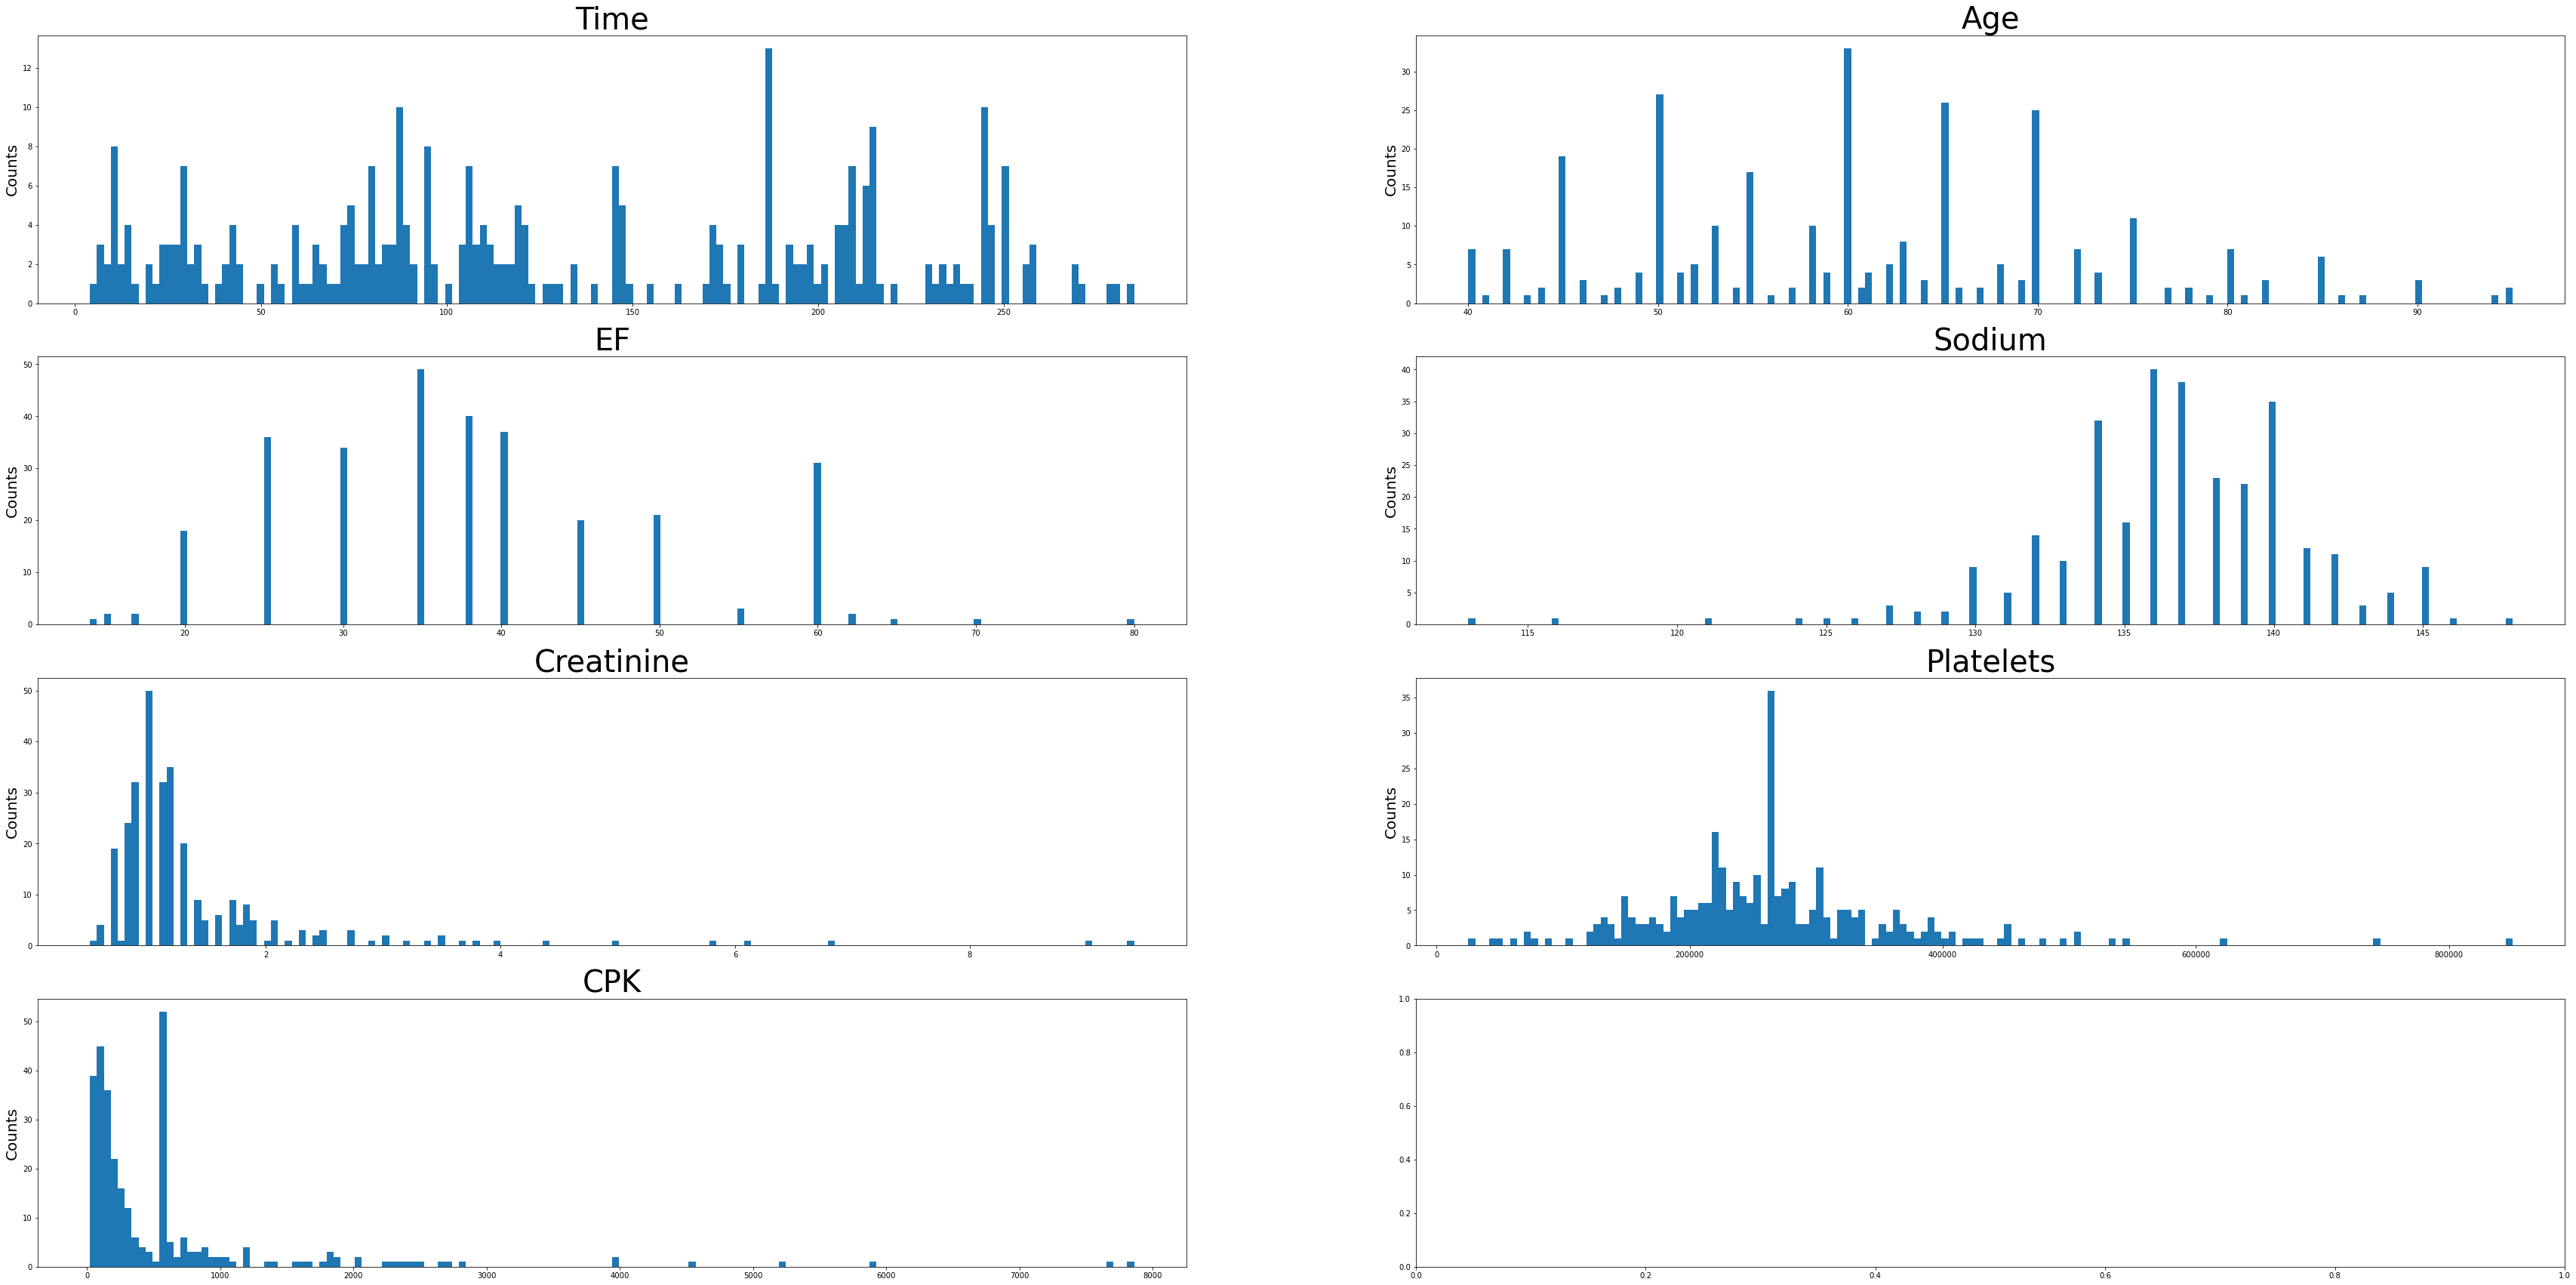

In [12]:
#Visualizing Numerical Data

#Setting Figure Size
plt.figure(figsize=[100,100])

f,a = plt.subplots(4,2, figsize=(60,30))

a = a.ravel()
for idx, ax in enumerate(a):
    ax.hist(df_num.iloc[:,idx], bins = 150)
    ax.set_title(df_num.columns[idx], size = 40)
    ax.set_ylabel('Counts', size = 20)
plt.show()

Sodium levels have positive skew, while creatinine, platelets, EF, and CPK levels appear negatively skewed.  The Time variable has a multimodal distribution.  Age looks to be approximately normally distributed with a slight positive skew.

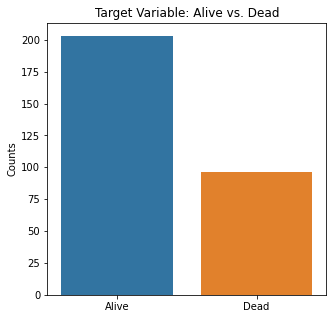

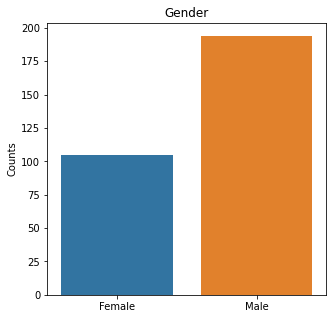

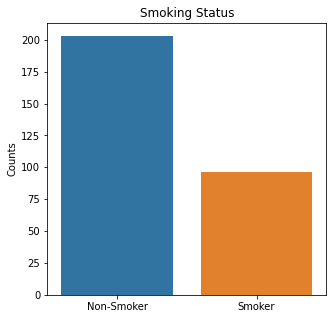

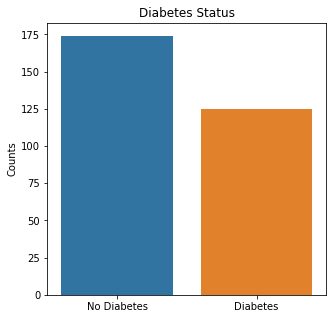

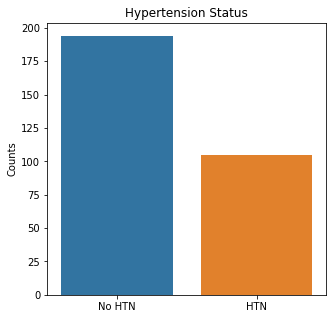

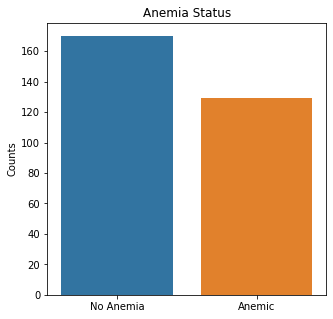

In [16]:
#Visualizing Categorical Data

sns.countplot(x = 'Event', data = df_cat)
plt.title('Target Variable: Alive vs. Dead')
plt.xticks([0,1], ['Alive', 'Dead'])
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Gender', data = df_cat)
plt.title('Gender')
plt.xticks([0,1], ['Female', 'Male'])
plt.xlabel(xlabel=None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Smoking', data = df_cat)
plt.title('Smoking Status')
plt.xticks([0,1], ['Non-Smoker', 'Smoker'])
plt.xlabel(xlabel=None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Diabetes', data = df_cat)
plt.title('Diabetes Status')
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.xlabel(xlabel=None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'BP', data = df_cat)
plt.title('Hypertension Status')
plt.xticks([0,1], ['No HTN', 'HTN'])
plt.xlabel(xlabel=None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Anemia', data = df_cat)
plt.title('Anemia Status')
plt.xticks([0,1], ['No Anemia', 'Anemic'])
plt.xlabel(xlabel=None)
plt.ylabel('Counts')
plt.show()

There were almost two times as many alive participants as dead participants in the study.  The majority of the participants were males, non-smokers, non-diabetic, without high blood pressure, and not anemic.

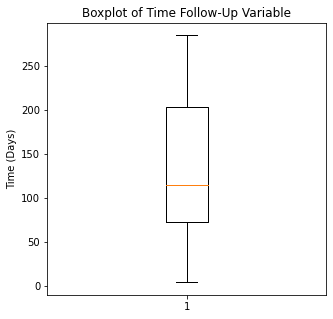

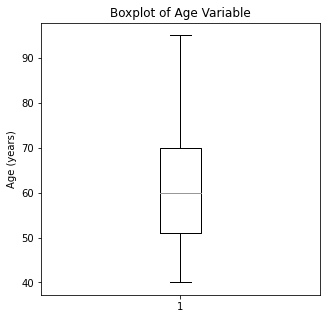

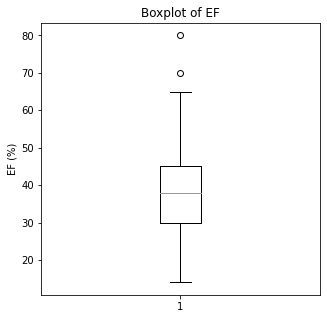

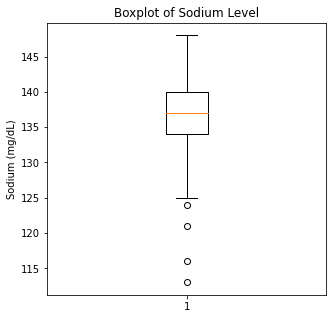

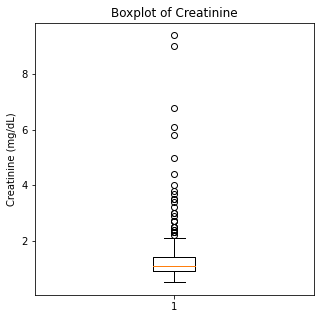

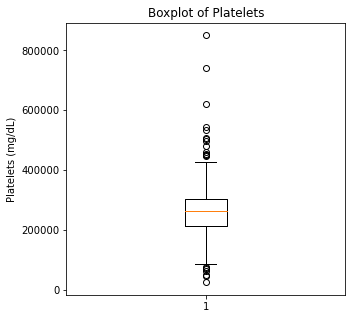

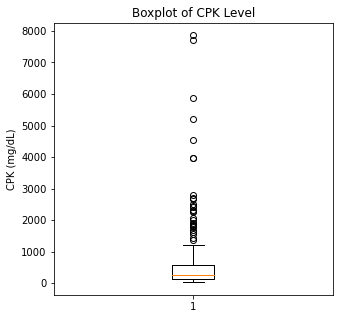

In [17]:
#Visualizing Boxplots to Assess for Outliers

plt.boxplot(df['Time'])
plt.title('Boxplot of Time Follow-Up Variable')
plt.ylabel('Time (Days)')
plt.show()

plt.boxplot(df['Age'])
plt.title('Boxplot of Age Variable')
plt.ylabel('Age (years)')
plt.show()

plt.boxplot(df['EF'])
plt.title('Boxplot of EF')
plt.ylabel('EF (%)')
plt.show()

plt.boxplot(df['Sodium'])
plt.title('Boxplot of Sodium Level')
plt.ylabel('Sodium (mg/dL)')
plt.show()

plt.boxplot(df['Creatinine'])
plt.title('Boxplot of Creatinine')
plt.ylabel('Creatinine (mg/dL)')
plt.show()

plt.boxplot(df['Platelets'])
plt.title('Boxplot of Platelets')
plt.ylabel('Platelets (mg/dL)')
plt.show()

plt.boxplot(df['CPK'])
plt.title('Boxplot of CPK Level')
plt.ylabel('CPK (mg/dL)')
plt.show()

There are some significant outliers in these variables, specifically regarding creatinine levels, CPK, platelet levels, and to some extent sodium levels.  We will keep these outliers in the dataset as these significant outliers could be predictive of worse prognosis and deleting them would affect our algorithms.

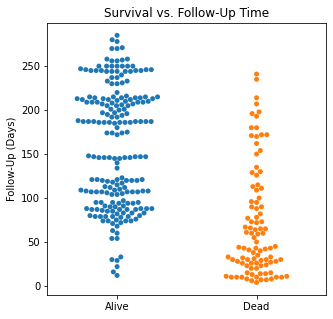

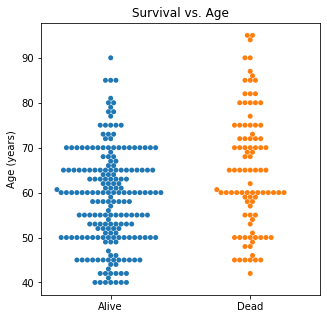

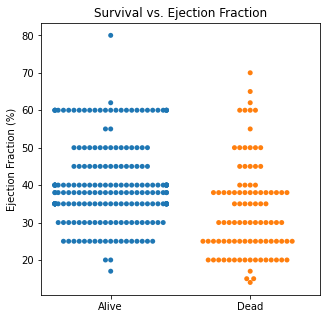

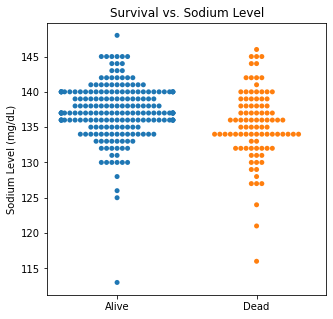

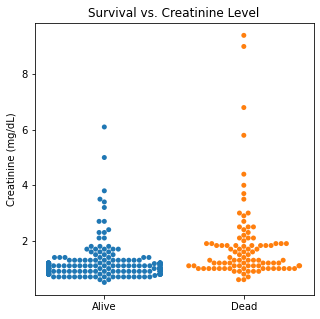

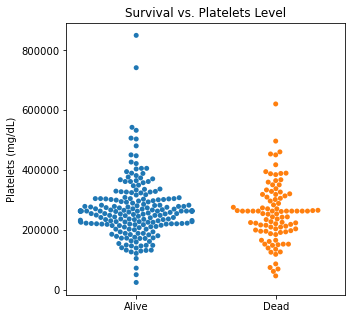

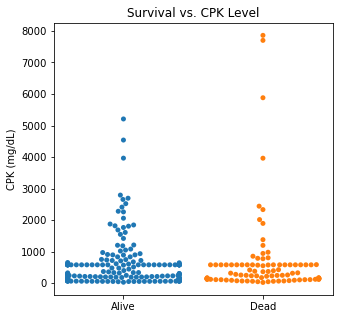

In [18]:
#Visualizing Swarm Plots to Compare The Target Variable to Our Explanatory Variables

categories = df.Event

sns.swarmplot(categories, df.Time)
plt.title('Survival vs. Follow-Up Time')
plt.xlabel(xlabel = None)
plt.ylabel('Follow-Up (Days)')
plt.xticks([0,1], ['Alive', 'Dead'])
plt.show()

sns.swarmplot(categories, df.Age)
plt.title('Survival vs. Age')
plt.xlabel(xlabel = None)
plt.ylabel('Age (years)')
plt.xticks([0,1], ['Alive', 'Dead'])
plt.show()

sns.swarmplot(categories, df.EF)
plt.title('Survival vs. Ejection Fraction')
plt.xlabel(xlabel = None)
plt.ylabel('Ejection Fraction (%)')
plt.xticks([0,1], ['Alive', 'Dead'])
plt.show()

sns.swarmplot(categories, df.Sodium)
plt.title('Survival vs. Sodium Level')
plt.xlabel(xlabel = None)
plt.ylabel('Sodium Level (mg/dL)')
plt.xticks([0,1], ['Alive', 'Dead'])
plt.show()

sns.swarmplot(categories, df.Creatinine)
plt.title('Survival vs. Creatinine Level')
plt.xlabel(xlabel = None)
plt.ylabel('Creatinine (mg/dL)')
plt.xticks([0,1], ['Alive', 'Dead'])
plt.show()

sns.swarmplot(categories, df.Platelets)
plt.title('Survival vs. Platelets Level')
plt.xlabel(xlabel = None)
plt.ylabel('Platelets (mg/dL)')
plt.xticks([0,1], ['Alive', 'Dead'])
plt.show()

sns.swarmplot(categories, df.CPK)
plt.title('Survival vs. CPK Level')
plt.xlabel(xlabel = None)
plt.ylabel('CPK (mg/dL)')
plt.xticks([0,1], ['Alive', 'Dead'])
plt.show()

There are several interesting findings when plotting survival vs our different numerical variables.  Unsurprisingly, those who had longer follow-up in days were more likely to be alive.  There was a trend that the older individuals were more likely to not have survived.  It is subtle, but there appears to be an association between lower EF and survival and this is logical however, looking at the distributions, there was not a significant difference between the two.  Likewise, there did not seem to be a significant difference between sodium level and survival.  The higher the level of creatinine above 2, the more likely they were to be dead.  These creatinine levels are exceedingly high and the higher the creatinine, the higher the likelihood of kidney failure which explains this trend.  There did not seem to be a significant difference between survival and the platelet/CPK levels.

## Machine Learning Algorithms

In general, when fitting the data using various models, the false negatives or predicting survival when the patient could be at risk of death should be minimized if at all possible.  The risk of predicting someone who is at higher risk of death who truly is not at risk would not be as catastrophic as a false negative.  The algorithms were evaluated using precision, recall, F1 scores, and ROC curves.

### Logistic Regression

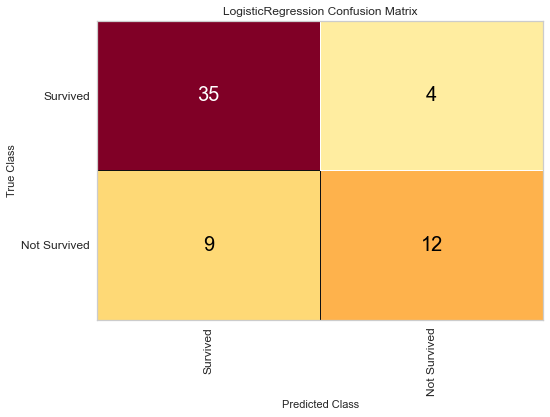

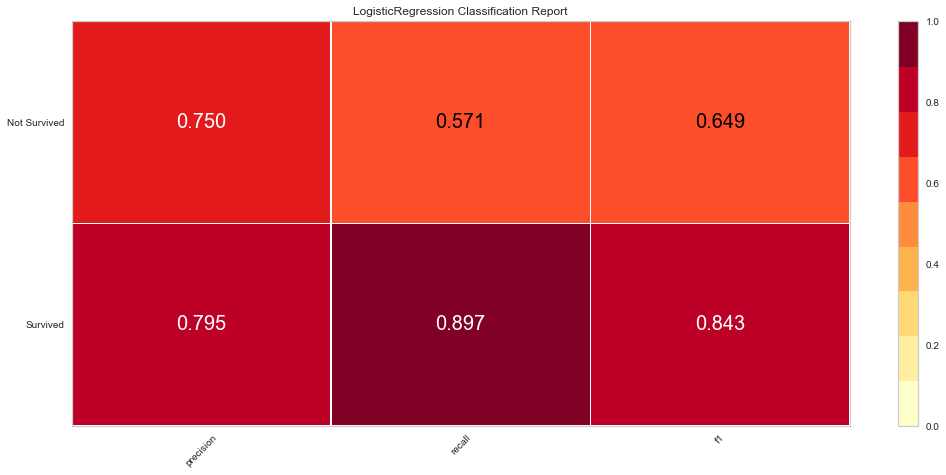

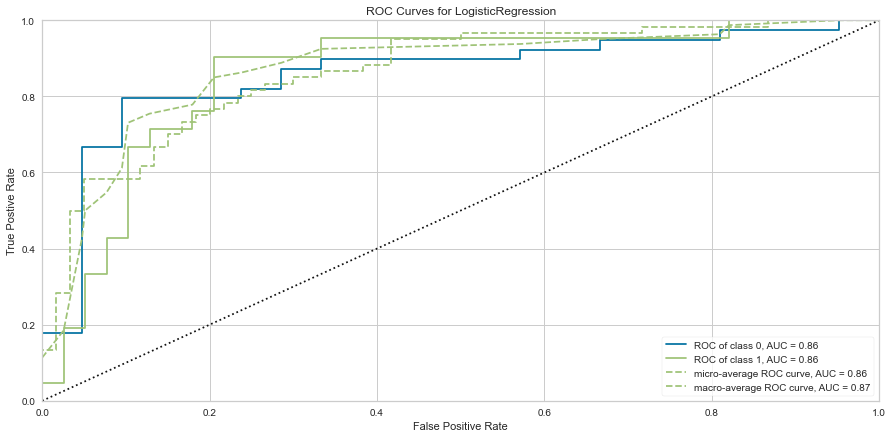

In [19]:
#Importing Packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC

#Creating Features and Target Objects
features = df.loc[:, df.columns != 'Event']
target = df['Event']

#Getting Dummies for Our Categoricals
features = pd.get_dummies(features)

#Creating Standardizer and Logit Objects
standardizer = StandardScaler()
logit = LogisticRegression()

#Standardizing Features
features_standardized = standardizer.fit_transform(features)

#Train/Test Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2)

#Fitting Data to Logistic Regression Classifier
logreg = logit.fit(features_train, target_train)

#Confusion Matrix Visualizer
classes = ['Survived', 'Not Survived']
cm = ConfusionMatrix(logit, classes = classes, percent = False)

#Fitting Passed Model
cm.fit(features_train, target_train)
cm.score(features_test, target_test)

#Changing Fontsize in Figure
for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

#Configuring Graph Parameters
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(logit, classes = classes)
visualizer.fit(features_train, target_train)
visualizer.score(features_test, target_test)
g = visualizer.poof()

#ROC/AUC Curve

roc = ROCAUC(logit)
roc.fit(features_train, target_train)
roc.score(features_test, target_test)
g = roc.poof()

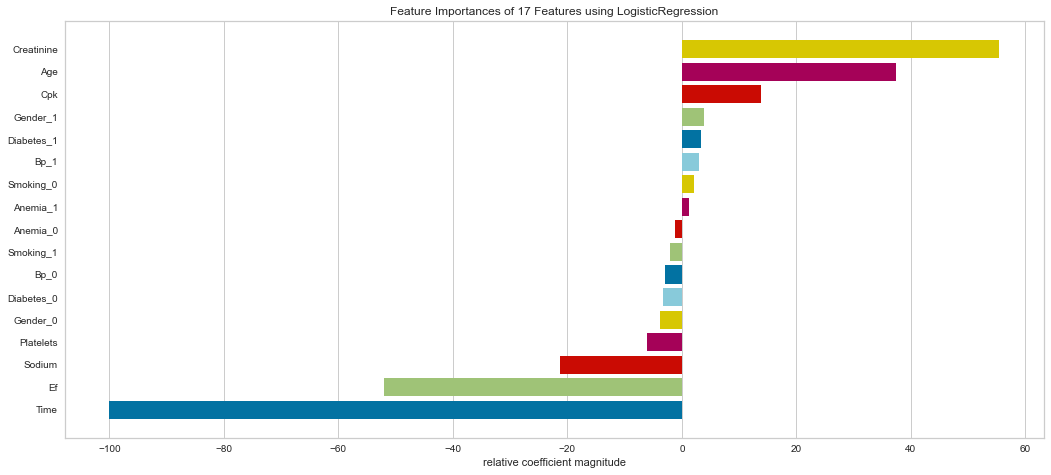

In [20]:
#Checking Variable Feature Importance

from yellowbrick.model_selection import FeatureImportances

#Getting Labels and Checking Feature Importance for Log Reg Model
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(logreg, labels = labels)
viz.fit(features_train, features_test)
viz.show()

The logistic regression model performed reasonably well with an F1 score of 0.615 of predicting death and 0.815 of predicting death.  There were 8 false negatives in this model.  The ROC was 0.81 for both class predictions.  After checking feature importance based on the logistic regression model, age, creatinine, CPK levels, and female gender were some of the most important features based on relative coefficients.

### KNN

In [21]:
#Importing Packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Getting Dummies for Target Variable
target = pd.get_dummies(df['Event'])

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 1)

#Starting with KNN of 3
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
knn.fit(features_train, target_train)

#Visualizing Metrics
target_pred = knn.predict(features_test)
test = np.array(target_test).argmax(axis=1)
predictions = np.array(target_pred).argmax(axis=1)
print('Confusion Matrix:\n', confusion_matrix(test, predictions), '\n')
print('Classification Report:\n', classification_report(test, predictions), '\n')

Confusion Matrix:
 [[34  7]
 [11  8]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.53      0.42      0.47        19

    accuracy                           0.70        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.69      0.70      0.69        60
 



In [22]:
#Hyperparameter Tuning for KNN Using GridSearch CV

param_dist = {"leaf_size": list(range(1,50)),
             "n_neighbors": list(range(1,30)),
             "p": [1,2]}

#Using GridSearch Object
clf = GridSearchCV(knn, param_dist, cv=10, n_jobs = -1)
best_model = clf.fit(features_standardized, target)

print('Best Leaf Size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Metric:', best_model.best_estimator_.get_params()['metric'])
print('Best Weights:', best_model.best_estimator_.get_params()['weights'])

Best Leaf Size: 1
Best p: 2
Best n_neighbors: 5
Best Metric: minkowski
Best Weights: uniform


In [23]:
#Running New Tuned Model and Evaluating Metrics
knn_best = KNeighborsClassifier(n_neighbors = 5, p = 1, leaf_size = 1, metric = "minkowski", weights= "uniform", n_jobs = -1)
knn_best.fit(features_train, target_train)
target_pred = knn_best.predict(features_test)
test = np.array(target_test).argmax(axis=1)
predictions = np.array(target_pred).argmax(axis=1)
print("Confusion Matrix:\n", confusion_matrix(test, predictions),'\n')
print("Classification Report:\n", classification_report(test, predictions))


Confusion Matrix:
 [[36  5]
 [13  6]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.55      0.32      0.40        19

    accuracy                           0.70        60
   macro avg       0.64      0.60      0.60        60
weighted avg       0.67      0.70      0.67        60



Using the tuned hyperparameters, interestingly, this model had better success at predicting death than survival.  However, there were 13 false negatives which we would want to avoid.  The F1 scores are not as high as the logistic regression model unfortunately.

### Support Vector Machine Classifier

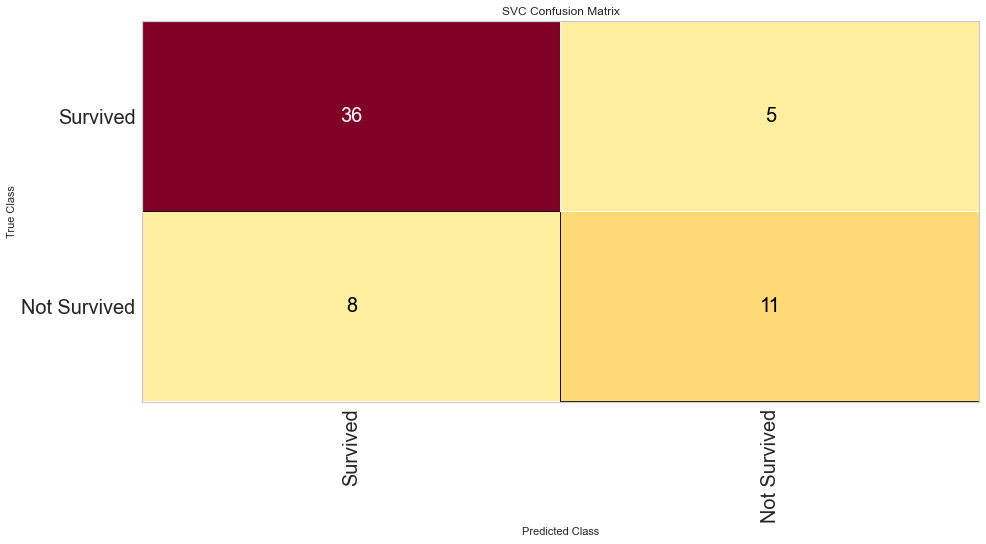

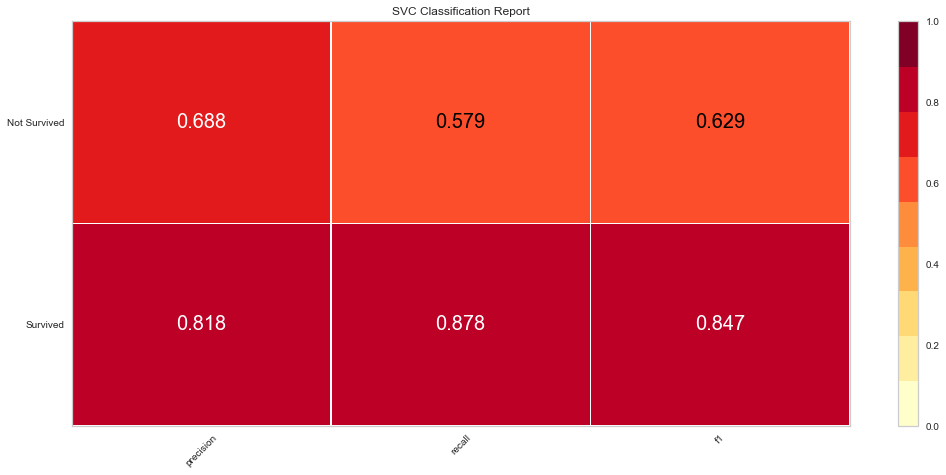

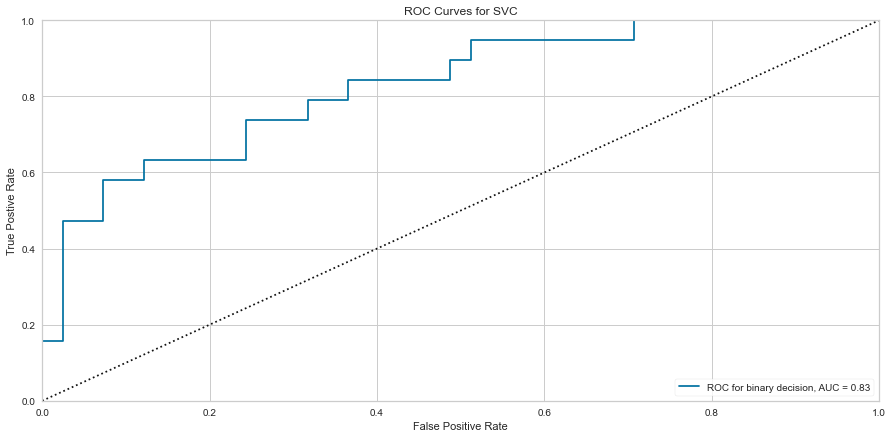

In [24]:
#Importing Packages
from sklearn.svm import SVC

#Resetting our Target Object to Not Have Dummy Variables
target = df['Event']

#Creating SVM Object
svc = SVC(kernel='linear')

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 1)

svc.fit(features_train, target_train)

cm_svc = ConfusionMatrix(svc, classes = classes, percent = False)
cm_svc.fit(features_train, target_train)
cm_svc.score(features_test, target_test)
cm_svc.poof()

svc_vis = ClassificationReport(svc, classes = classes)
svc_vis.fit(features_train, target_train)
svc_vis.score(features_test, target_test)
svc_vis.poof()

svc_roc = ROCAUC(svc, micro = False, macro = False, per_class = False)
svc_roc.fit(features_train, target_train)
svc_roc.score(features_test, target_test)
svc_roc.poof()

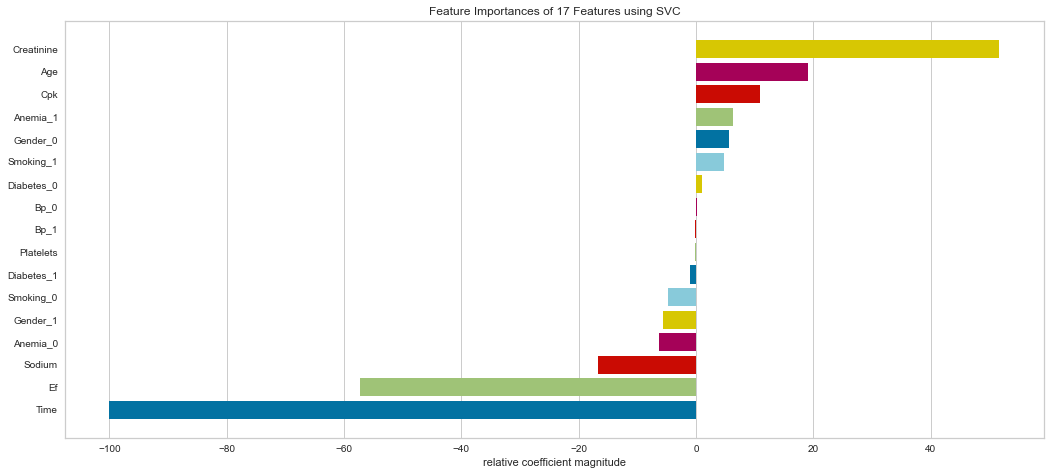

In [25]:
#Checking Feature Importance
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(svc, labels = labels)
viz.fit(features_train, features_test)
viz.show()

Support vector machine was run using the same parameters.  This model had a low number of false negatives at 8 people incorrectly predicted.  The F1 scores were higher than the logistic regression model at 0.847 for predicting survival and 0.629 for predicting death.  The ROC was slightly better at 0.83.  Overall, this appears to be marginally better.  Checking feature importance, creatinine, age, cpk, and female gender were all highly important.  The one difference is that the presence of anemia and current smoking also appeared to be relatively important in the model.

### Random Forest

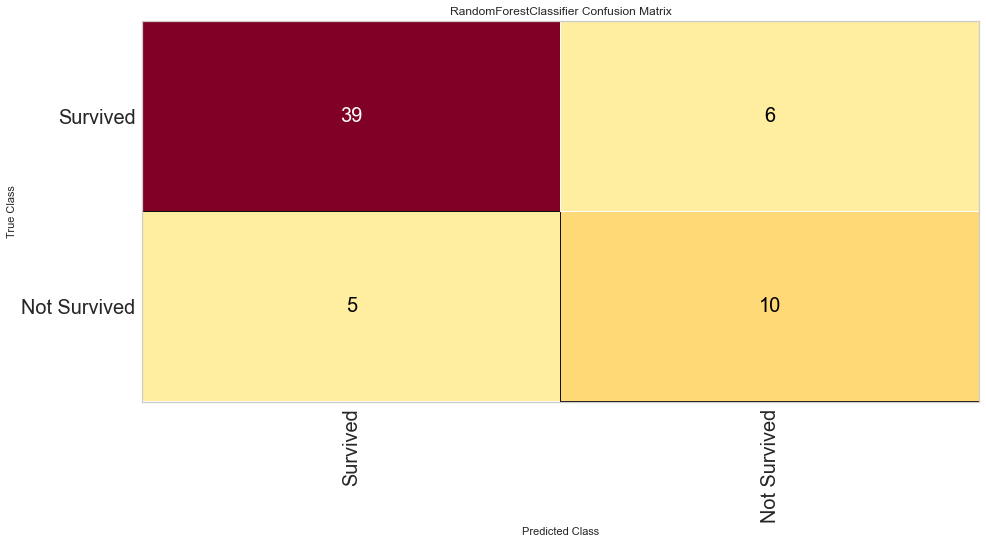

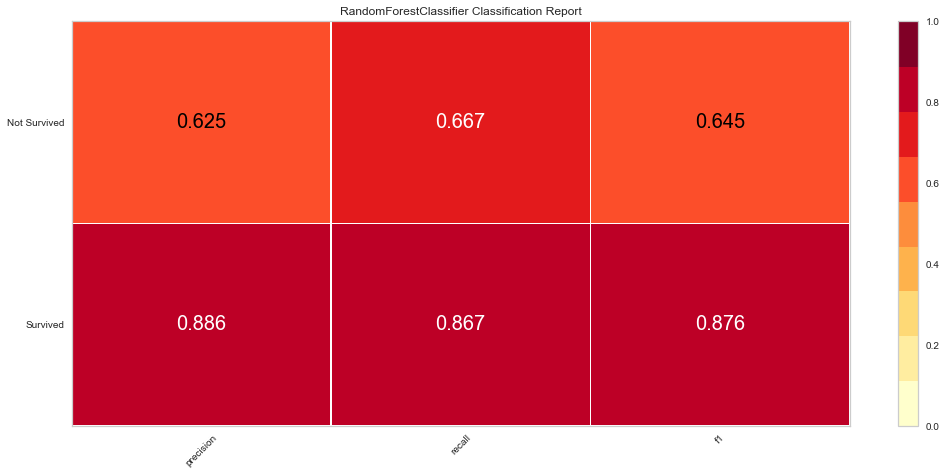

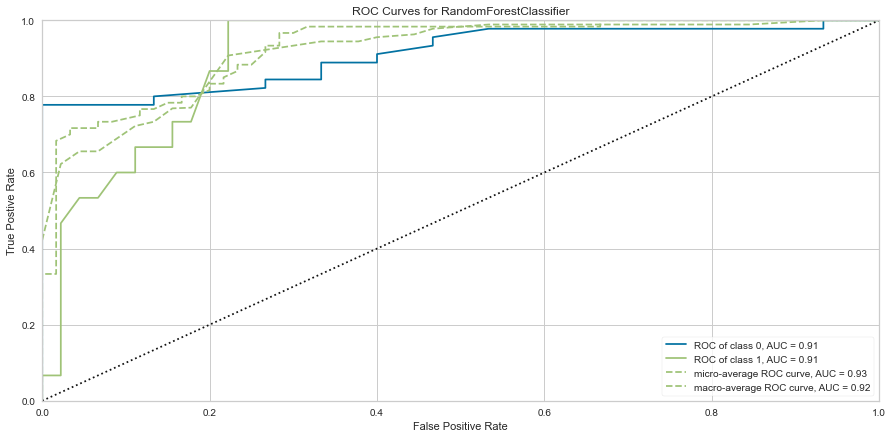

In [26]:
#Importing Packages
from sklearn.ensemble import RandomForestClassifier

#Resetting Features and Targets
features = df.loc[:, df.columns != 'Event']
target = df['Event']

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2)

#Creating Object
rfc = RandomForestClassifier(n_estimators = 100, random_state = 1)
rfc.fit(features_train, target_train)

#Visualizing Confusion Matrix, Class Report, and ROC Curve
rfc_cm = ConfusionMatrix(rfc, classes = classes, percent = False)
rfc_cm.fit(features_train, target_train)
rfc_cm.score(features_test, target_test)
rfc_cm.poof()

rfc_class = ClassificationReport(rfc, classes = classes)
rfc_class.fit(features_train, target_train)
rfc_class.score(features_test, target_test)
rfc_class.poof()

rfc_roc = ROCAUC(rfc)
rfc_roc.fit(features_train, target_train)
rfc_roc.score(features_test, target_test)
rfc_roc.poof()

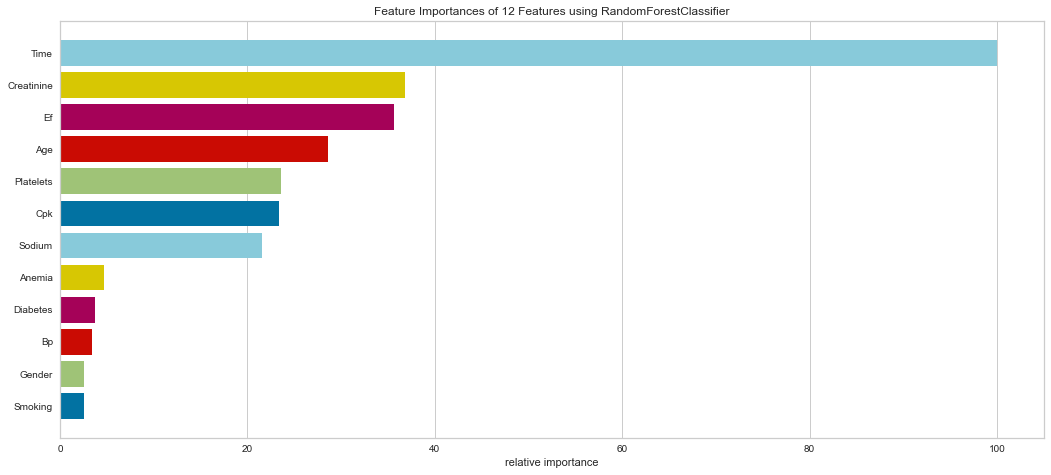

In [27]:
#Checking Feature Importance
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(rfc, labels = labels)
viz.fit(features_train, features_test)
viz.show()

This model performed quite well.  It had only 4 false negatives and an F1 score of 0.70 for predicting death, and 0.884 for predicting survival.  The ROC was 0.90 for both classes.

It is interesting that in this model, the ensemble method put a high weight on follow-up time.  Creatinine, EF, CPK, Age, Platelets, and Sodium levels were all highly important.  Gender was less important in this model.  This result is interesting in that EF is directly tied to prognosis in heart failure patients and sodium level can be indicative of fluid balance.  Abnormal sodium levels can indicate worsening heart failure symptoms, so this makes medical sense.

## XG Boost

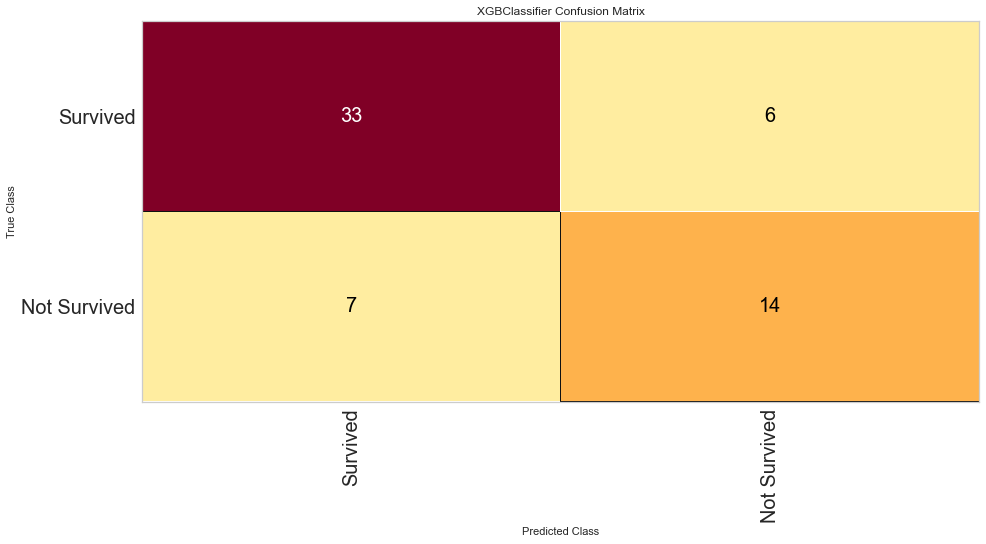

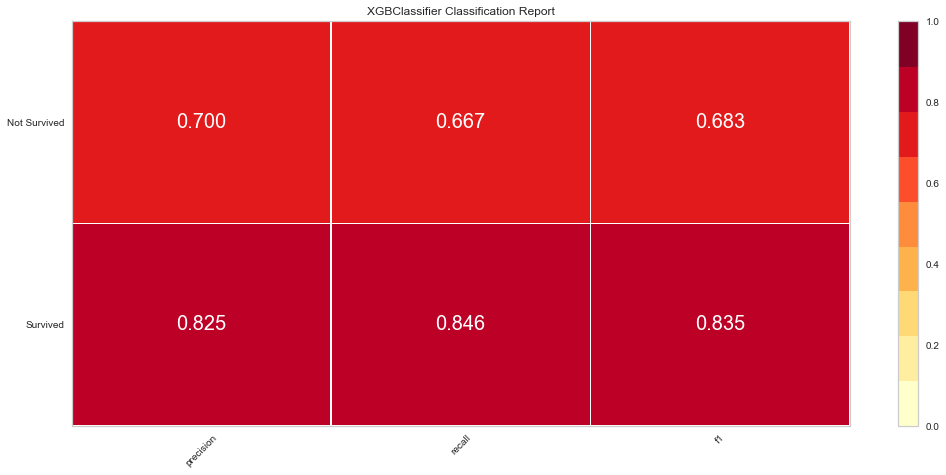

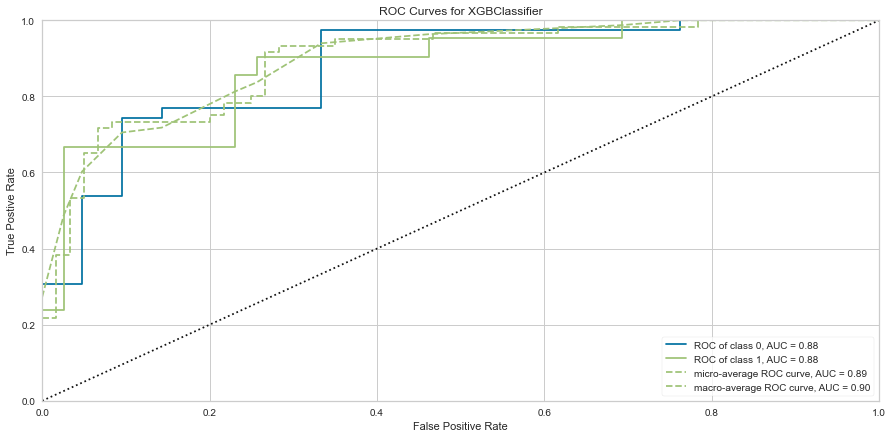

In [39]:
#Importing Packages
from xgboost import XGBClassifier

features = pd.get_dummies(features)
target = df['Event']

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2)

xgb = XGBClassifier(random_state = 1)
xgb.fit(features_train, target_train)

#Visualizing Confusion Matrix, Class Report, and ROC Curve
xgb_cm = ConfusionMatrix(xgb, classes = classes, percent = False)
xgb_cm.fit(features_train, target_train)
xgb_cm.score(features_test, target_test)
xgb_cm.poof()

xgb_class = ClassificationReport(xgb, classes = classes)
xgb_class.fit(features_train, target_train)
xgb_class.score(features_test, target_test)
xgb_class.poof()

xgb_roc = ROCAUC(xgb)
xgb_roc.fit(features_train, target_train)
xgb_roc.score(features_test, target_test)
xgb_roc.poof()

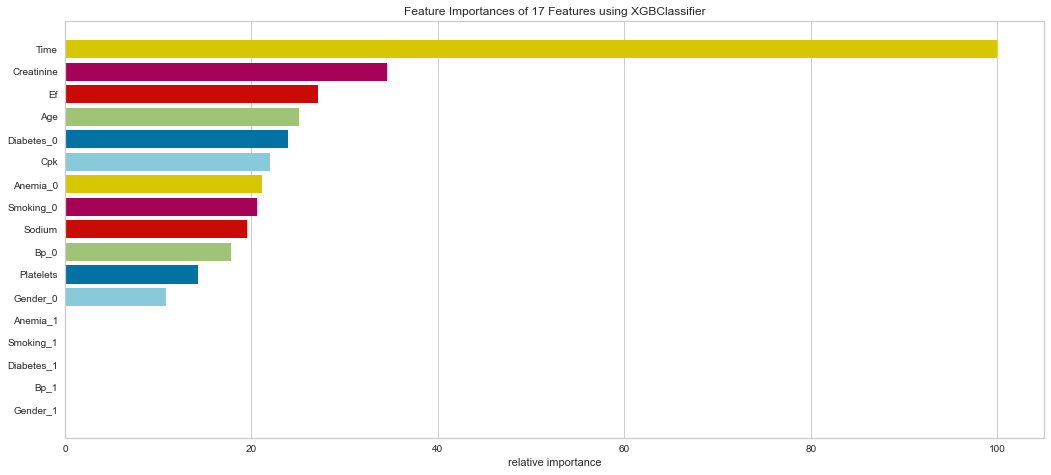

In [29]:
#Checking Feature Importance
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(xgb, labels = labels)
viz.fit(features_train, features_test)
viz.show()

This model also performed quite well.  There were only 4 false negatives.  The F1 score for predicting death was 0.769 and predicting survival was 0.889.  The ROC was 0.92.  Feature importance showed a similar result to the Random Forest method showing that time of follow-up, creatinine, EF, female gender, age, and sodium level were all important among several others.

## Conclusions

Heart failure is a very deadly disease.  Even 20 years ago, this diagnosis would be a death sentence.  There have been significant pharmacologic advancements in recent years which have improved survival.  Those with heart failure can have hospital admissions for fluid overload, trouble breathing, and even other cardiac events.  However, heart failure survival is still dependent upon the severity of the symptoms and other objective measurements as well as early diagnosis and treatment (Colucci, 2019).  Therefore, it is timely that we may be able to utilize machine learning algorithms to help better predict death.  Perhaps if we can predict a higher risk of death based on severity of various lab measurements and other risk factors, there could be an intensification of therapy and/or aggressive follow-up and monitoring to ensure adequate care and prolonged symptom-free survival.

It is not a significant surprise that the Random Forest and XG Boost models performed the best based on ROC and F1 scores.  The Random Forest managed to edge out the XG Boost performance by a small margin.  Since both of these are ensemble methods, they have multiple algorithms that are being evaluated and the prediction is then confirmed using a majority vote option.  Which model to use is somewhat arbitrary given their largely similar results.

In this population of patients, there were significantly more people alive than dead at the end of the study period.  This explains why many of the models predicted more to be alive than dead on a relative basis.  The ensemble methods performed the best at this showing the power of these algorithm to be able to predict the harder class (death).  This is the point of this project; we want to primarily identify those at high risk of mortality to either perform some sort of intervention or close monitoring.  However, predicting survival can also be beneficial in that if a patient were to be predicted to survive by certain criteria, you could ensure certain factors about their health are optimized and be reassured.

Finally, it is fascinating that the machine learning algorithms all seemed to agree on certain variables that relatively more important to the prediction.  The majority of them noted age, creatinine, CPK, and female gender to have more predictive power.  The ensemble methods picked up on more of the traditional variables of sodium, ejection fraction, among others.  Many of these variables are already medically validated as related to heart failure prognosis.  The machine learning algorithms, at least based on this dataset, agreed with these factors.  These factors do differ slightly based on the different algorithms used but many of the algorithms picked out similar important variables.

This dataset is smaller and has a small number of patients.  This is partly due to the low numbers of heart failure overall.  This is a limitation on the predictive power.  Much larger datasets would be necessary among a large patient demographic to apply to the general population.  This does continue to show that machine learning can aid healthcare workers and providers in clinical management.